In [1]:
import pandas as pd

df = pd.read_csv('data/산업재해.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=-rUtNKAYzr0,안전신문유튜브,5개월 전(수정됨),00:00 시작~!00:17 첫 번째 사례 = 상가 신축공사 현장 추락 사고 01:...
1,1,https://www.youtube.com//watch?v=-rUtNKAYzr0,멍푸,5개월 전(수정됨),재현 장면이 재밌네요ㅋㅋㅋ 산업재해에 대해 잘알아가고 갑니다~
2,2,https://www.youtube.com//watch?v=-rUtNKAYzr0,공찬빈파파TV(KPapaTV),5개월 전,정말 위기탈출넘버원인지 알았네요 재연 장면 왜케 웃기나요!ㅋㅋㅋ 근데 저는 진짜 위...
3,3,https://www.youtube.com//watch?v=-rUtNKAYzr0,YDJ Music Art,5개월 전,펀집과 연기가 대박입니다 멋진 영상이네요 화이팅입니다 ♡♡♡
4,4,https://www.youtube.com//watch?v=-rUtNKAYzr0,춘자사롱,5개월 전,와 좋은 정보에 재미도 있고 머릿속에 쏙쏙 들어오네요~
...,...,...,...,...,...
688,688,https://www.youtube.com//watch?v=5qEXOnenwkE,D다니엘,4개월 전,산재보험 근로자가 업무 중에 다쳤을때!! 그렇군요! 감사합니다 ㅎㅎ 구독 좋아요!
689,689,https://www.youtube.com//watch?v=Nz5cWTZ8Gnc,Harry Kim,1주 전,저 선생님 전 공무원이고 공무상 재해 생각 중인데 제가 신청해도 경위조사서를 기관장...
690,690,https://www.youtube.com//watch?v=j_joQqynzTI,박지태,2개월 전,산재종결후에 다친쪽 눈에서 눈물이 자꾸만 납니다. 어떻게 해야 되는지‥
691,691,https://www.youtube.com//watch?v=j_joQqynzTI,조윤옥,2개월 전,안보여요 어떡케보라는거여요


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'지하조직': 107,
 '회사': 94,
 '산재': 86,
 '대한민국': 74,
 '조직': 74,
 '이재명': 67,
 '비밀': 63,
 '병원': 53,
 '기상천': 51,
 '지사': 48,
 '자원관리도우미': 44,
 '비밀조직': 43,
 '적폐': 40,
 '세계': 39,
 '현장': 36,
 '그림자정부': 36,
 '산재처리': 34,
 '상상이상': 33,
 '안전': 32,
 '영상': 31,
 '사고': 30,
 '정부': 30,
 '정도': 29,
 '국민모두': 29,
 '진짜보수': 29,
 '문제': 28,
 '국민': 28,
 '보상': 27,
 '안녕': 27,
 '진짜진보': 27,
 '정보': 26,
 '노무사': 25,
 '신청': 25,
 '이재명지사': 25,
 '왕국': 24,
 '나라': 23,
 '보수': 23,
 '상태': 22,
 '산업재해': 21,
 '진보': 21,
 '비밀결사조직': 21,
 '선생': 20,
 '속임수': 20,
 '시간': 19,
 '이상': 19,
 '생각': 19,
 '신세계': 19,
 '업무': 18,
 '근로자': 18,
 '비밀단체': 18}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'지하조직': 107,
 '회사': 94,
 '산재': 86,
 '대한민국': 74,
 '조직': 74,
 '이재명': 67,
 '비밀': 63,
 '병원': 53,
 '기상천': 51,
 '지사': 48,
 '자원관리도우미': 44,
 '비밀조직': 43,
 '적폐': 40,
 '세계': 39,
 '현장': 36,
 '그림자정부': 36,
 '산재처리': 34,
 '상상이상': 33,
 '안전': 32,
 '영상': 31,
 '사고': 30,
 '정부': 30,
 '정도': 29,
 '국민모두': 29,
 '진짜보수': 29,
 '문제': 28,
 '국민': 28,
 '보상': 27,
 '안녕': 27,
 '진짜진보': 27}

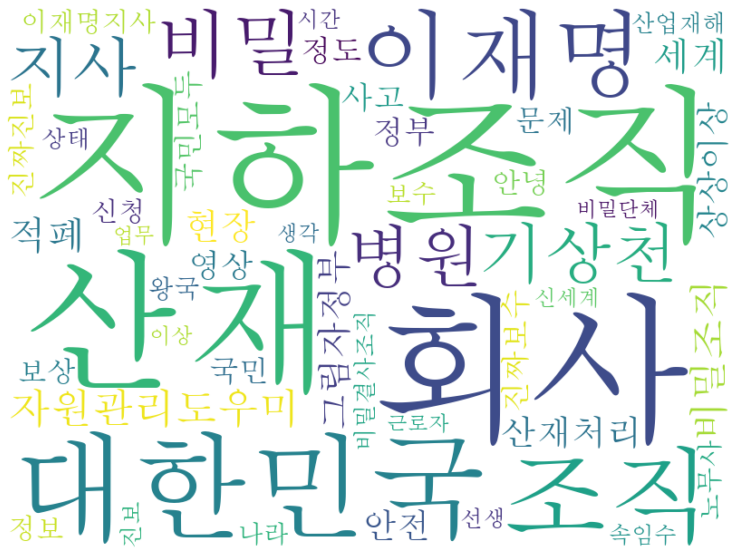

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

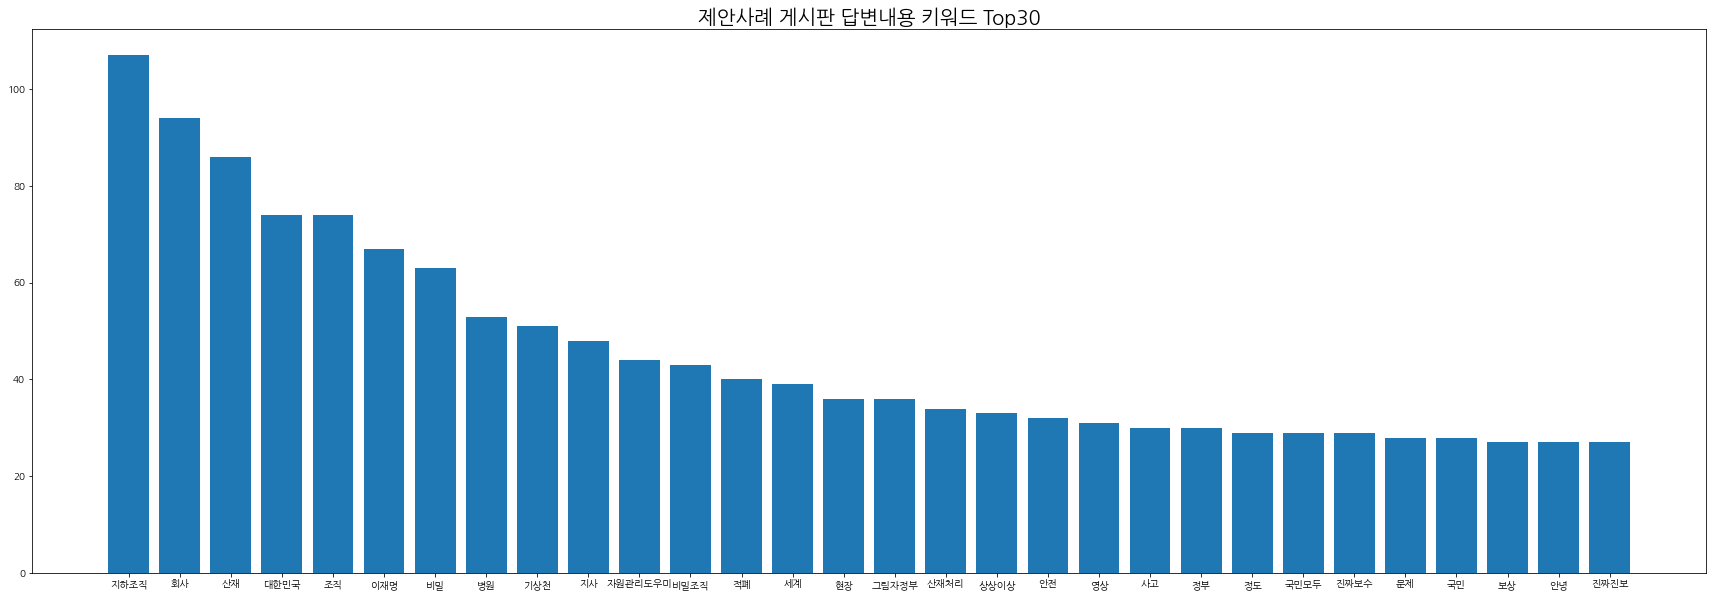

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'지하조직': 0,
 '회사': 1,
 '산재': 2,
 '대한민국': 3,
 '조직': 4,
 '이재명': 5,
 '비밀': 6,
 '병원': 7,
 '기상천': 8,
 '지사': 9,
 '자원관리도우미': 10,
 '비밀조직': 11,
 '적폐': 12,
 '세계': 13,
 '현장': 14,
 '그림자정부': 15,
 '산재처리': 16,
 '상상이상': 17,
 '안전': 18,
 '영상': 19,
 '사고': 20,
 '정부': 21,
 '정도': 22,
 '국민모두': 23,
 '진짜보수': 24,
 '문제': 25,
 '국민': 26,
 '보상': 27,
 '안녕': 28,
 '진짜진보': 29,
 '정보': 30,
 '노무사': 31,
 '신청': 32,
 '이재명지사': 33,
 '왕국': 34,
 '나라': 35,
 '보수': 36,
 '상태': 37,
 '산업재해': 38,
 '진보': 39,
 '비밀결사조직': 40,
 '선생': 41,
 '속임수': 42,
 '시간': 43,
 '이상': 44,
 '생각': 45,
 '신세계': 46,
 '업무': 47,
 '근로자': 48,
 '비밀단체': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'지하조직': 0,
 '회사': 1,
 '산재': 2,
 '대한민국': 3,
 '조직': 4,
 '이재명': 5,
 '비밀': 6,
 '병원': 7,
 '기상천': 8,
 '지사': 9,
 '자원관리도우미': 10,
 '비밀조직': 11,
 '적폐': 12,
 '세계': 13,
 '현장': 14,
 '그림자정부': 15,
 '산재처리': 16,
 '상상이상': 17,
 '안전': 18,
 '영상': 19,
 '사고': 20,
 '정부': 21,
 '정도': 22,
 '국민모두': 23,
 '진짜보수': 24,
 '문제': 25,
 '국민': 26,
 '보상': 27,
 '안녕': 28,
 '진짜진보': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'지하조직': 0,
 '회사': 1,
 '산재': 2,
 '대한민국': 3,
 '조직': 4,
 '이재명': 5,
 '비밀': 6,
 '병원': 7,
 '기상천': 8,
 '지사': 9,
 '자원관리도우미': 10,
 '비밀조직': 11,
 '적폐': 12,
 '세계': 13,
 '현장': 14,
 '그림자정부': 15,
 '산재처리': 16,
 '상상이상': 17,
 '안전': 18,
 '영상': 19,
 '사고': 20,
 '정부': 21,
 '정도': 22,
 '국민모두': 23,
 '진짜보수': 24,
 '문제': 25,
 '국민': 26,
 '보상': 27,
 '안녕': 28,
 '진짜진보': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '지하조직',
 1: '회사',
 2: '산재',
 3: '대한민국',
 4: '조직',
 5: '이재명',
 6: '비밀',
 7: '병원',
 8: '기상천',
 9: '지사',
 10: '자원관리도우미',
 11: '비밀조직',
 12: '적폐',
 13: '세계',
 14: '현장',
 15: '그림자정부',
 16: '산재처리',
 17: '상상이상',
 18: '안전',
 19: '영상',
 20: '사고',
 21: '정부',
 22: '정도',
 23: '국민모두',
 24: '진짜보수',
 25: '문제',
 26: '국민',
 27: '보상',
 28: '안녕',
 29: '진짜진보',
 30: '정보',
 31: '노무사',
 32: '신청',
 33: '이재명지사',
 34: '왕국',
 35: '나라',
 36: '보수',
 37: '상태',
 38: '산업재해',
 39: '진보',
 40: '비밀결사조직',
 41: '선생',
 42: '속임수',
 43: '시간',
 44: '이상',
 45: '생각',
 46: '신세계',
 47: '업무',
 48: '근로자',
 49: '비밀단체'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '지하조직',
 1: '회사',
 2: '산재',
 3: '대한민국',
 4: '조직',
 5: '이재명',
 6: '비밀',
 7: '병원',
 8: '기상천',
 9: '지사',
 10: '자원관리도우미',
 11: '비밀조직',
 12: '적폐',
 13: '세계',
 14: '현장',
 15: '그림자정부',
 16: '산재처리',
 17: '상상이상',
 18: '안전',
 19: '영상',
 20: '사고',
 21: '정부',
 22: '정도',
 23: '국민모두',
 24: '진짜보수',
 25: '문제',
 26: '국민',
 27: '보상',
 28: '안녕',
 29: '진짜진보'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0, 15, ...,  1,  3,  0],
       [ 0, 15,  0, ...,  2,  2,  0],
       ...,
       [ 0,  1,  2, ...,  0,  1,  0],
       [ 0,  3,  2, ...,  1,  0,  0],
       [10,  0,  0, ...,  0,  0,  0]])

In [14]:
answer_sentences_nouns_result

[['시작'],
 ['사례',
  '상가',
  '신축공사',
  '현장',
  '추락',
  '사고',
  '사례',
  '종이',
  '제조업체',
  '종이',
  '사례',
  '하수관',
  '정비공',
  '현장',
  '질식사',
  '사고',
  '안전',
  '안전',
  '방심',
  '안심',
  '종이',
  '안전',
  '말자'],
 ['산업재해', '관심', '안전', '인식', '사고', '해결방안'],
 ['재현', '장면', '산업재해'],
 ['위기탈출넘버원', '재연', '장면'],
 ['위기탈춤넘버원', '알바', '예전', '영상'],
 ['그때', '이후', '종영때'],
 ['연기', '대박', '영상', '화이팅'],
 ['정보', '재미', '머릿속'],
 ['유익', '영상', '구독'],
 [],
 ['유익', '영상'],
 [],
 ['정보'],
 ['참사'],
 [],
 ['안전'],
 [],
 [],
 [],
 [],
 ['유익', '정보'],
 ['산업재해', '영상'],
 [],
 [],
 [],
 ['산재탈출넘버원'],
 ['유익', '정보'],
 ['유익', '영상'],
 ['구독', '가용'],
 [],
 [],
 [],
 ['시청완료', '구완', '종완료'],
 ['안전'],
 [],
 ['연출'],
 ['은정'],
 ['몰입도', '장난'],
 [],
 ['영상', '공유'],
 [],
 [],
 ['편집', '기술'],
 ['산업재해', '조심'],
 ['참사', '다음', '안일'],
 [],
 [],
 ['산재탈출'],
 [],
 [],
 [],
 ['옥천'],
 [],
 [],
 ['필요', '정보'],
 ['심리적', '안정요법'],
 [],
 ['경각심', '서로조심'],
 ['직업적', '트라우마', '신분', '상담', '다행'],
 ['산업재해'],
 [],
 ['경각심'],
 ['안전불감증'],
 [],
 [],
 ['온라인', '클래스', '링크'],
 [],
 [],
 

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0,  0,  0, 25, 30,  0, 22,  1, 19,  0,  0, 14, 10, 13,  0, 15,
         0, 15,  0,  0,  3, 15,  0, 18, 16,  0,  5,  0,  0, 16],
       [ 0,  0, 15,  0,  0,  0,  0,  8,  0,  1,  0,  0,  0,  0,  1,  0,
         6,  0,  1,  1,  4,  0,  3,  0,  0,  2,  0,  2,  4,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  7,  0,  1,  0,  0,  0,  0,  5,  0,
         2,  0,  0,  2,  3,  0,  4,  0,  0,  1,  0,  7,  1,  0],
       [25,  0,  0,  0, 20,  9, 17,  0, 14,  5,  0,  9,  7, 14,  1, 10,
         0, 11,  0,  0,  3, 14,  0, 13, 12,  1,  5,  0,  0, 12],
       [30,  0,  0, 20,  0,  0, 19,  1, 16,  0,  0, 14,  8, 13,  0, 15,
         0, 13,  0,  0,  3, 12,  0, 15, 13,  0,  4,  0,  0, 13],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0, 19,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  3,  0,  0,  0],
       [22,  0,  0, 17, 19,  0,  0,  0, 13,  0,  0, 13,  8, 11,  0, 15,
         0, 11,  0,  0,  3, 14,  0, 17, 16,  0,  4,  0,  0, 16],
       [ 1,  8,  7,  0,  1,  0,  0,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {3: {'weight': 25},
   4: {'weight': 30},
   6: {'weight': 22},
   7: {'weight': 1},
   8: {'weight': 19},
   11: {'weight': 14},
   12: {'weight': 10},
   13: {'weight': 13},
   15: {'weight': 15},
   17: {'weight': 15},
   20: {'weight': 3},
   21: {'weight': 15},
   23: {'weight': 18},
   24: {'weight': 16},
   26: {'weight': 5},
   29: {'weight': 16}}),
 (1,
  {2: {'weight': 15},
   7: {'weight': 8},
   9: {'weight': 1},
   14: {'weight': 1},
   16: {'weight': 6},
   18: {'weight': 1},
   19: {'weight': 1},
   20: {'weight': 4},
   22: {'weight': 3},
   25: {'weight': 2},
   27: {'weight': 2},
   28: {'weight': 4}}),
 (2,
  {1: {'weight': 15},
   7: {'weight': 7},
   9: {'weight': 1},
   14: {'weight': 5},
   16: {'weight': 2},
   19: {'weight': 2},
   20: {'weight': 3},
   22: {'weight': 4},
   25: {'weight': 1},
   27: {'weight': 7},
   28: {'weight': 1}}),
 (3,
  {0: {'weight': 25},
   4: {'weight': 20},
   5: {'weight': 9},
   6: {'weight': 17},
   8: {'weight': 14},
   

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {3: {'weight': 25},
   4: {'weight': 30},
   6: {'weight': 22},
   7: {'weight': 1},
   8: {'weight': 19},
   11: {'weight': 14},
   12: {'weight': 10},
   13: {'weight': 13},
   15: {'weight': 15},
   17: {'weight': 15},
   20: {'weight': 3},
   21: {'weight': 15},
   23: {'weight': 18},
   24: {'weight': 16},
   26: {'weight': 5},
   29: {'weight': 16},
   30: {'weight': 7},
   34: {'weight': 14},
   35: {'weight': 7},
   36: {'weight': 15},
   39: {'weight': 14},
   40: {'weight': 7},
   42: {'weight': 13},
   44: {'weight': 1},
   45: {'weight': 1},
   46: {'weight': 14},
   49: {'weight': 10}}),
 (1,
  {2: {'weight': 15},
   7: {'weight': 8},
   9: {'weight': 1},
   14: {'weight': 1},
   16: {'weight': 6},
   18: {'weight': 1},
   19: {'weight': 1},
   20: {'weight': 4},
   22: {'weight': 3},
   25: {'weight': 2},
   27: {'weight': 2},
   28: {'weight': 4},
   31: {'weight': 4},
   32: {'weight': 3},
   35: {'weight': 1},
   37: {'weight': 2},
   38: {'weight': 2},
   43: {

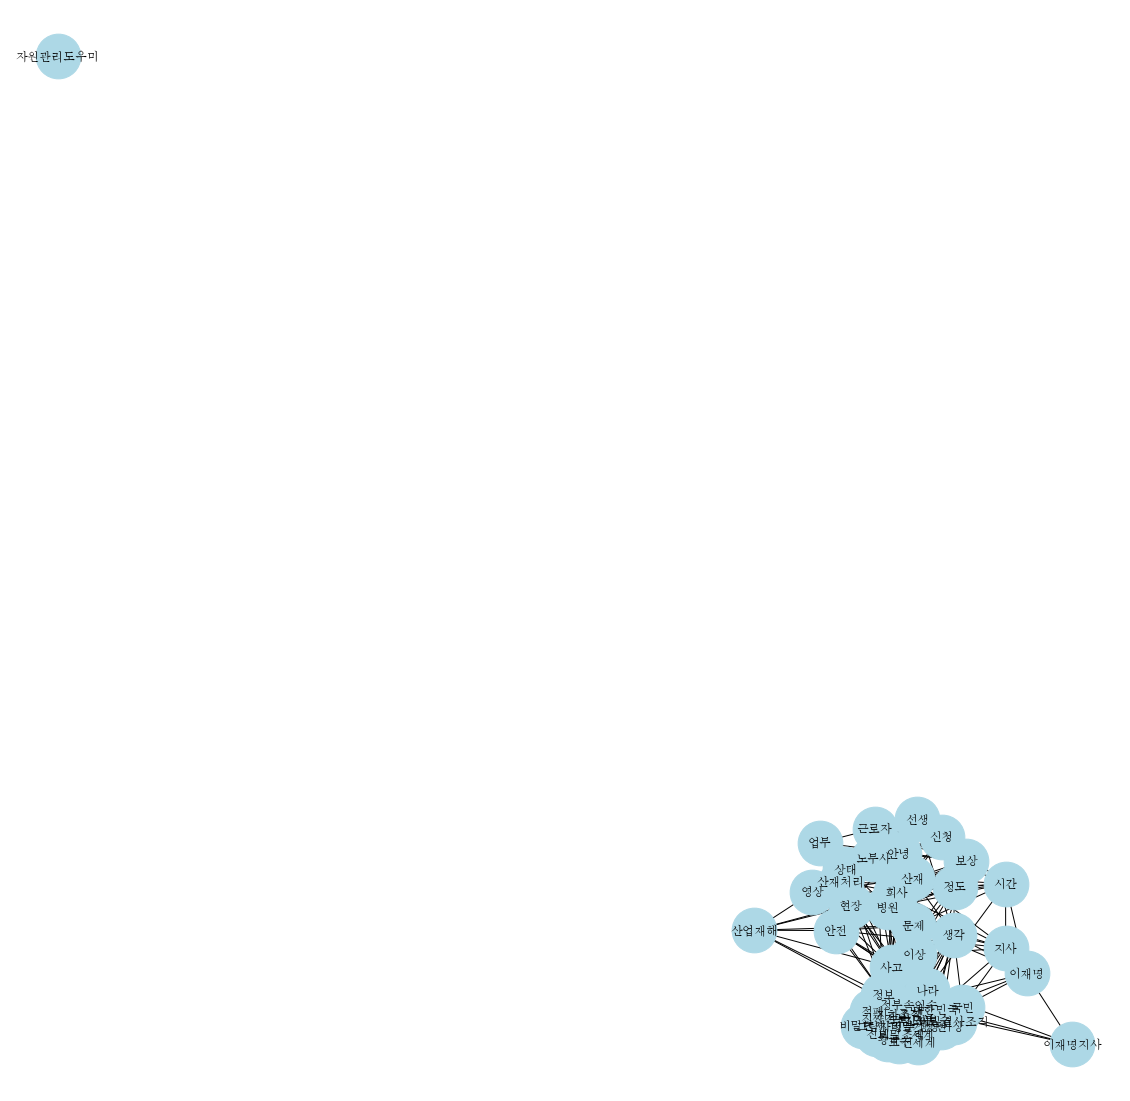

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

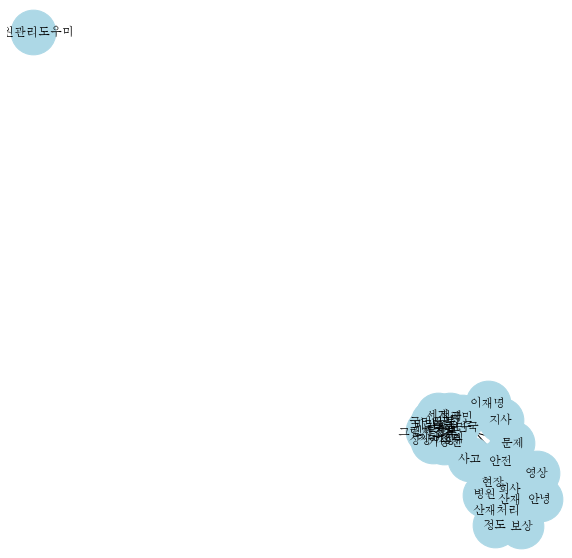

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.3984780352819094,
 1: 0.40887311446317653,
 2: 0.4478134110787172,
 3: 0.4161098067545602,
 4: 0.3984780352819094,
 5: 0.3482993197278912,
 6: 0.3457382953181273,
 7: 0.4236072807501379,
 8: 0.3984780352819094,
 9: 0.460984393757503,
 10: 0.0,
 11: 0.3482993197278912,
 12: 0.29572583750481324,
 13: 0.3535369034831978,
 14: 0.41982507288629733,
 15: 0.3562152133580705,
 16: 0.4521193092621664,
 17: 0.38541318166610905,
 18: 0.4313798914061037,
 19: 0.4847464759099516,
 20: 0.4897959183673469,
 21: 0.36734693877551017,
 22: 0.38541318166610905,
 23: 0.3457382953181273,
 24: 0.2487852283770651,
 25: 0.43537414965986393,
 26: 0.38541318166610905,
 27: 0.3984780352819094,
 28: 0.4313798914061037,
 29: 0.2487852283770651,
 30: 0.4478134110787172,
 31: 0.4435887562572199,
 32: 0.3702394343564197,
 33: 0.33827631772133315,
 34: 0.25010855405992183,
 35: 0.4435887562572199,
 36: 0.3457382953181273,
 37: 0.4313798914061037,
 38: 0.43537414965986393,
 39: 0.4435887562572199,
 40: 0.37023943

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.284573502722323,
 1: 0.34659593280282935,
 2: 0.3218390804597701,
 3: 0.3037582332429291,
 4: 0.284573502722323,
 5: 0.284573502722323,
 6: 0.19590204897551228,
 7: 0.3975659229208925,
 8: 0.284573502722323,
 9: 0.3653308480894688,
 10: 0.0,
 11: 0.22159412097230075,
 12: 0.27586206896551724,
 13: 0.20637009739405107,
 14: 0.3337590464027246,
 15: 0.22159412097230075,
 16: 0.3337590464027246,
 17: 0.19733199093883716,
 18: 0.37033538025507795,
 19: 0.41591511936339526,
 20: 0.4661117717003568,
 21: 0.3037582332429291,
 22: 0.3218390804597701,
 23: 0.20480668756530826,
 24: 0.2413793103448276,
 25: 0.3807673627974745,
 26: 0.36045977011494257,
 27: 0.36045977011494257,
 28: 0.3807673627974745,
 29: 0.2413793103448276}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.5510204081632653,
 1: 0.44897959183673464,
 2: 0.42857142857142855,
 3: 0.6326530612244897,
 4: 0.5510204081632653,
 5: 0.16326530612244897,
 6: 0.5102040816326531,
 7: 0.3061224489795918,
 8: 0.5510204081632653,
 9: 0.2040816326530612,
 10: 0.0,
 11: 0.5102040816326531,
 12: 0.5306122448979591,
 13: 0.5102040816326531,
 14: 0.26530612244897955,
 15: 0.5102040816326531,
 16: 0.2857142857142857,
 17: 0.5306122448979591,
 18: 0.26530612244897955,
 19: 0.2857142857142857,
 20: 0.8163265306122448,
 21: 0.5918367346938775,
 22: 0.26530612244897955,
 23: 0.5102040816326531,
 24: 0.4897959183673469,
 25: 0.26530612244897955,
 26: 0.5714285714285714,
 27: 0.18367346938775508,
 28: 0.26530612244897955,
 29: 0.4897959183673469,
 30: 0.5918367346938775,
 31: 0.24489795918367346,
 32: 0.2040816326530612,
 33: 0.08163265306122448,
 34: 0.4897959183673469,
 35: 0.6326530612244897,
 36: 0.5102040816326531,
 37: 0.26530612244897955,
 38: 0.16326530612244897,
 39: 0.5102040816326531,
 40: 0.51020

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.5517241379310345,
 1: 0.41379310344827586,
 2: 0.3793103448275862,
 3: 0.6551724137931034,
 4: 0.5517241379310345,
 5: 0.1724137931034483,
 6: 0.5172413793103449,
 7: 0.3793103448275862,
 8: 0.5517241379310345,
 9: 0.27586206896551724,
 10: 0.0,
 11: 0.5172413793103449,
 12: 0.5862068965517241,
 13: 0.5172413793103449,
 14: 0.3103448275862069,
 15: 0.5172413793103449,
 16: 0.27586206896551724,
 17: 0.5172413793103449,
 18: 0.3103448275862069,
 19: 0.27586206896551724,
 20: 0.896551724137931,
 21: 0.5862068965517241,
 22: 0.24137931034482757,
 23: 0.5172413793103449,
 24: 0.5172413793103449,
 25: 0.3448275862068966,
 26: 0.6206896551724138,
 27: 0.20689655172413793,
 28: 0.24137931034482757,
 29: 0.5172413793103449}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.3348488634166271,
 1: 0.0025402490966514994,
 2: 0.0021619184248984984,
 3: 0.27060249888724786,
 4: 0.29982494613423627,
 5: 0.014318800914241266,
 6: 0.28132071189568786,
 7: 0.004934627497086651,
 8: 0.2283580413159476,
 9: 0.008290269812546009,
 10: 5.481045395024619e-20,
 11: 0.20073555400565568,
 12: 0.14082352287057043,
 13: 0.18522734976051083,
 14: 0.0030201757635978095,
 15: 0.2074639619494558,
 16: 0.001255301231788166,
 17: 0.19737542726677848,
 18: 0.002840994225168388,
 19: 0.0010634002104293388,
 20: 0.06046599612728253,
 21: 0.19505178859278743,
 22: 0.0010050286843478068,
 23: 0.23456974896627578,
 24: 0.2242098560843613,
 25: 0.0032731749039300135,
 26: 0.07654725136140929,
 27: 0.0008754032118350455,
 28: 0.0010052204895946053,
 29: 0.2242098560843613,
 30: 0.12181792326265851,
 31: 0.0008371786332730662,
 32: 0.00019891402585094764,
 33: 0.006636041023547282,
 34: 0.18292731412995863,
 35: 0.0960211164174653,
 36: 0.19746535845190452,
 37: 0.001368902823632808

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.37144318665514453,
 1: 0.0023419634958164186,
 2: 0.0019780703924926453,
 3: 0.30207765534860126,
 4: 0.334801900466576,
 5: 0.020520960813505535,
 6: 0.3171431069028266,
 7: 0.006658781920155185,
 8: 0.26274082943616206,
 9: 0.012214508011671888,
 10: 4.759161742595544e-19,
 11: 0.23071462871440165,
 12: 0.15551521331183377,
 13: 0.2039271903246837,
 14: 0.00425027793156447,
 15: 0.23523131637284228,
 16: 0.0016030565081364431,
 17: 0.22166258334897748,
 18: 0.0033849621484821936,
 19: 0.0005840521458752251,
 20: 0.0639044081500508,
 21: 0.2219717927308623,
 22: 0.0009895914724440888,
 23: 0.26814183065388236,
 24: 0.25750290676527277,
 25: 0.004514962604810986,
 26: 0.08400282928147366,
 27: 0.0005442867915515827,
 28: 0.0005035180986709501,
 29: 0.25750290676527277}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [28]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

NetworkXError: Graph not connected.

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.3984780352819094,
 1: 0.40887311446317653,
 2: 0.4478134110787172,
 3: 0.4161098067545602,
 4: 0.3984780352819094,
 5: 0.3482993197278912,
 6: 0.3457382953181273,
 7: 0.4236072807501379,
 8: 0.3984780352819094,
 9: 0.460984393757503,
 10: 0.0,
 11: 0.3482993197278912,
 12: 0.29572583750481324,
 13: 0.3535369034831978,
 14: 0.41982507288629733,
 15: 0.3562152133580705,
 16: 0.4521193092621664,
 17: 0.38541318166610905,
 18: 0.4313798914061037,
 19: 0.4847464759099516,
 20: 0.4897959183673469,
 21: 0.36734693877551017,
 22: 0.38541318166610905,
 23: 0.3457382953181273,
 24: 0.2487852283770651,
 25: 0.43537414965986393,
 26: 0.38541318166610905,
 27: 0.3984780352819094,
 28: 0.4313798914061037,
 29: 0.2487852283770651,
 30: 0.4478134110787172,
 31: 0.4435887562572199,
 32: 0.3702394343564197,
 33: 0.33827631772133315,
 34: 0.25010855405992183,
 35: 0.4435887562572199,
 36: 0.3457382953181273,
 37: 0.4313798914061037,
 38: 0.43537414965986393,
 39: 0.4435887562572199,
 40: 0.37023943

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.284573502722323,
 1: 0.34659593280282935,
 2: 0.3218390804597701,
 3: 0.3037582332429291,
 4: 0.284573502722323,
 5: 0.284573502722323,
 6: 0.19590204897551228,
 7: 0.3975659229208925,
 8: 0.284573502722323,
 9: 0.3653308480894688,
 10: 0.0,
 11: 0.22159412097230075,
 12: 0.27586206896551724,
 13: 0.20637009739405107,
 14: 0.3337590464027246,
 15: 0.22159412097230075,
 16: 0.3337590464027246,
 17: 0.19733199093883716,
 18: 0.37033538025507795,
 19: 0.41591511936339526,
 20: 0.4661117717003568,
 21: 0.3037582332429291,
 22: 0.3218390804597701,
 23: 0.20480668756530826,
 24: 0.2413793103448276,
 25: 0.3807673627974745,
 26: 0.36045977011494257,
 27: 0.36045977011494257,
 28: 0.3807673627974745,
 29: 0.2413793103448276}

# 매개중심성

In [31]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

NetworkXError: Graph not connected.

In [32]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

NetworkXError: Graph not connected.

In [33]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\networkx\algorithms\centrality\subgraph_alg.py:246: RuntimeWarning: invalid value encountered in true_divide
  B = (expA - scipy.linalg.expm(A.A)) / expA


{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: 0.0,
 11: nan,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 25: nan,
 26: nan,
 27: nan,
 28: nan,
 29: nan,
 30: nan,
 31: nan,
 32: nan,
 33: nan,
 34: nan,
 35: nan,
 36: nan,
 37: nan,
 38: nan,
 39: nan,
 40: nan,
 41: nan,
 42: nan,
 43: nan,
 44: nan,
 45: nan,
 46: nan,
 47: nan,
 48: nan,
 49: nan}

In [34]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [35]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [36]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [37]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [38]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'지하조직': 0.5510204081632653,
 '회사': 0.44897959183673464,
 '산재': 0.42857142857142855,
 '대한민국': 0.6326530612244897,
 '조직': 0.5510204081632653,
 '이재명': 0.16326530612244897,
 '비밀': 0.5102040816326531,
 '병원': 0.3061224489795918,
 '기상천': 0.5510204081632653,
 '지사': 0.2040816326530612,
 '자원관리도우미': 0.0,
 '비밀조직': 0.5102040816326531,
 '적폐': 0.5306122448979591,
 '세계': 0.5102040816326531,
 '현장': 0.26530612244897955,
 '그림자정부': 0.5102040816326531,
 '산재처리': 0.2857142857142857,
 '상상이상': 0.5306122448979591,
 '안전': 0.26530612244897955,
 '영상': 0.2857142857142857,
 '사고': 0.8163265306122448,
 '정부': 0.5918367346938775,
 '정도': 0.26530612244897955,
 '국민모두': 0.5102040816326531,
 '진짜보수': 0.4897959183673469,
 '문제': 0.26530612244897955,
 '국민': 0.5714285714285714,
 '보상': 0.18367346938775508,
 '안녕': 0.26530612244897955,
 '진짜진보': 0.4897959183673469,
 '정보': 0.5918367346938775,
 '노무사': 0.24489795918367346,
 '신청': 0.2040816326530612,
 '이재명지사': 0.08163265306122448,
 '왕국': 0.4897959183673469,
 '나라': 0.6326530612244897,
 '

In [39]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'지하조직': 0.5517241379310345,
 '회사': 0.41379310344827586,
 '산재': 0.3793103448275862,
 '대한민국': 0.6551724137931034,
 '조직': 0.5517241379310345,
 '이재명': 0.1724137931034483,
 '비밀': 0.5172413793103449,
 '병원': 0.3793103448275862,
 '기상천': 0.5517241379310345,
 '지사': 0.27586206896551724,
 '자원관리도우미': 0.0,
 '비밀조직': 0.5172413793103449,
 '적폐': 0.5862068965517241,
 '세계': 0.5172413793103449,
 '현장': 0.3103448275862069,
 '그림자정부': 0.5172413793103449,
 '산재처리': 0.27586206896551724,
 '상상이상': 0.5172413793103449,
 '안전': 0.3103448275862069,
 '영상': 0.27586206896551724,
 '사고': 0.896551724137931,
 '정부': 0.5862068965517241,
 '정도': 0.24137931034482757,
 '국민모두': 0.5172413793103449,
 '진짜보수': 0.5172413793103449,
 '문제': 0.3448275862068966,
 '국민': 0.6206896551724138,
 '보상': 0.20689655172413793,
 '안녕': 0.24137931034482757,
 '진짜진보': 0.5172413793103449}

In [40]:
answer_top50_word2id

{'지하조직': 0,
 '회사': 1,
 '산재': 2,
 '대한민국': 3,
 '조직': 4,
 '이재명': 5,
 '비밀': 6,
 '병원': 7,
 '기상천': 8,
 '지사': 9,
 '자원관리도우미': 10,
 '비밀조직': 11,
 '적폐': 12,
 '세계': 13,
 '현장': 14,
 '그림자정부': 15,
 '산재처리': 16,
 '상상이상': 17,
 '안전': 18,
 '영상': 19,
 '사고': 20,
 '정부': 21,
 '정도': 22,
 '국민모두': 23,
 '진짜보수': 24,
 '문제': 25,
 '국민': 26,
 '보상': 27,
 '안녕': 28,
 '진짜진보': 29,
 '정보': 30,
 '노무사': 31,
 '신청': 32,
 '이재명지사': 33,
 '왕국': 34,
 '나라': 35,
 '보수': 36,
 '상태': 37,
 '산업재해': 38,
 '진보': 39,
 '비밀결사조직': 40,
 '선생': 41,
 '속임수': 42,
 '시간': 43,
 '이상': 44,
 '생각': 45,
 '신세계': 46,
 '업무': 47,
 '근로자': 48,
 '비밀단체': 49}

In [41]:
print(연결중심성.keys())

dict_keys(['지하조직', '회사', '산재', '대한민국', '조직', '이재명', '비밀', '병원', '기상천', '지사', '자원관리도우미', '비밀조직', '적폐', '세계', '현장', '그림자정부', '산재처리', '상상이상', '안전', '영상', '사고', '정부', '정도', '국민모두', '진짜보수', '문제', '국민', '보상', '안녕', '진짜진보'])
